<a href="https://colab.research.google.com/github/IvanSalinas2000/Aprendizaje-automatico/blob/main/Tareas/MetodosDeSeleccionTarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Seleccion de caracteristicas
#ANOVA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datos=pd.read_csv("/content/diamantesCLEAN.csv")
datos

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53902,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53903,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53904,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53905,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
x= datos[["carat","cut","color","clarity","depth","table","x","y","z"]]
y=datos[["price"]]

f_value=f_regression(x,y)
f_value

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3.03857671e+05, 8.62998468e+01, 1.65039206e+03, 2.77082788e+02,
        5.70517055e+00, 8.85221537e+02, 1.99342283e+05, 2.02758866e+05,
        1.90055402e+05]),
 array([0.00000000e+000, 1.60176007e-020, 0.00000000e+000, 4.64023251e-062,
        1.69184312e-002, 5.87910349e-193, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000]))

In [ ]:
pass_test = []
not_pass_test = []
alpha = 0.01
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])

carat 0.0
cut 1.6017600723254318e-20
color 0.0
clarity 4.640232507931756e-62
depth 0.016918431182405127
table 5.879103485215806e-193
x 0.0
y 0.0
z 0.0


In [ ]:
not_pass_test

['depth']

Podemos apreciar que depth no paso la prueba

Vamos arepresentar los que pasaron la prueba en una tabla

In [ ]:
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
carat,303857.670862
y,202758.866371
x,199342.283368
z,190055.402451
color,1650.392065
table,885.221537
clarity,277.082788
cut,86.299847
depth,5.705171


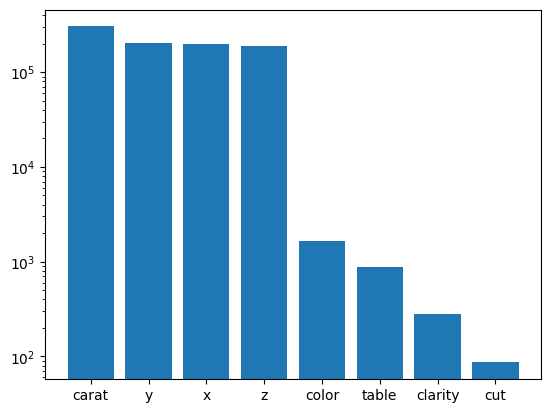

In [ ]:
plt.figure()
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value)
plt.yscale("log")
plt.show()
#usamos una relacion logaritmica

Las varibales con mas influencia son carat,x,y,z respecto a price

##R de correlacion

Usamos la correlacion para conocer si la aportacion de las varibales es negativa o positiva

In [ ]:
from sklearn.feature_selection import r_regression

In [ ]:
x_pass= datos[["carat","cut","color","clarity","table","x","y","z"]]
df_results_pass=df_results.drop("depth")

In [ ]:
r_value = r_regression(x_pass, y)
r_value

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.92158965,  0.03998003,  0.17235761, -0.07151167,  0.12710846,
        0.88721181,  0.88880719,  0.88263357])

In [ ]:
df_results_pass['r_value'] = r_value
colors = []
for v in df_results_pass['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')

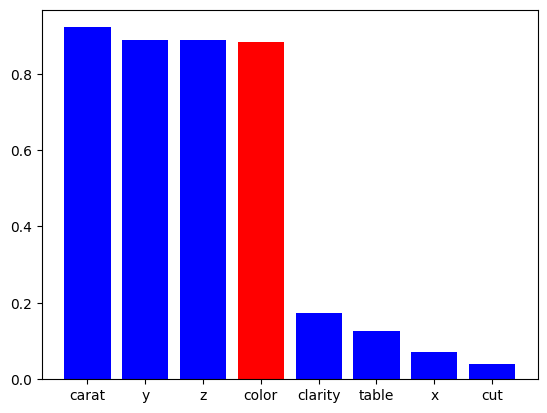

In [ ]:
df_results_pass['r_value_abs'] = df_results_pass['r_value'].abs()
df_results_pass.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_results_pass.index, df_results_pass.r_value_abs, color = colors)
plt.show()

##Umbral de varianza

In [ ]:
# Normalización de variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled

,carat,cut,color,clarity,depth,table,x,y,z
0,0.006237,0.50,0.166667,0.428571,0.469298,0.333333,0.031384,0.043732,0.075203
1,0.002079,0.75,0.166667,0.285714,0.394737,0.500000,0.022825,0.023324,0.050813
2,0.006237,0.25,0.166667,0.571429,0.267544,0.611111,0.045649,0.056851,0.050813
3,0.018711,0.75,0.833333,0.714286,0.508772,0.416667,0.067047,0.080175,0.115854
4,0.022869,0.25,1.000000,0.428571,0.548246,0.416667,0.087019,0.097668,0.140244
...,...,...,...,...,...,...,...,...,...
53902,0.108108,0.50,0.000000,0.285714,0.438596,0.388889,0.288160,0.303207,0.292683
53903,0.108108,0.25,0.000000,0.285714,0.539474,0.333333,0.279601,0.301749,0.315041
53904,0.103950,1.00,0.000000,0.285714,0.526316,0.472222,0.275321,0.291545,0.304878
53905,0.137214,0.75,0.666667,0.428571,0.447368,0.416667,0.345221,0.355685,0.341463


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.00970125, 0.06597607, 0.08039782, 0.06069579, 0.00387947,
       0.00382382, 0.02549846, 0.02624032, 0.0197498 ])

In [ ]:
# Se agregan las varianzas a los resultados
df_results['variance'] = selector.variances_
df_results.sort_values('variance', ascending = False, inplace = True)
df_results

,f_value,r_value,r_value_abs,variance
clarity,277.082788,0.887212,0.887212,0.080398
cut,86.299847,0.888807,0.888807,0.065976
depth,5.705171,0.882634,0.882634,0.060696
y,202758.866371,0.039980,0.039980,0.026240
z,190055.402451,-0.071512,0.071512,0.025498
color,1650.392065,-0.010287,0.010287,0.019750
carat,303857.670862,0.921590,0.921590,0.009701
x,199342.283368,0.172358,0.172358,0.003879
table,885.221537,0.127108,0.127108,0.003824


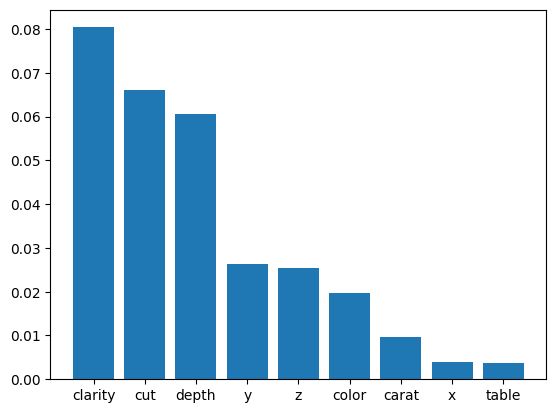

In [ ]:
plt.figure()
plt.bar(df_results.index, df_results.variance)
plt.show()

Generalmente se suelen eliminar las que tienen varianza de 0.2, en este caso no se eliminaria ninguna

##Informacion mutua

mediremos la independencia entre variables

In [ ]:
from sklearn.feature_selection import mutual_info_regression


In [ ]:
mi = mutual_info_regression(x, y, random_state=0)
mi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.96352321, 0.10097723, 0.28471159, 0.36458026, 0.03658712,
       0.05706996, 1.48246395, 1.49456739, 1.43254938])

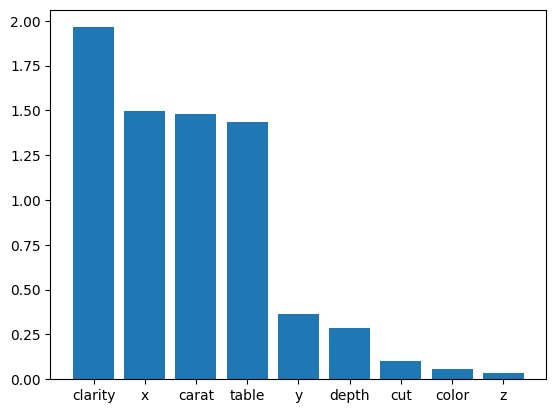

In [ ]:
# Agregarlo a los resultados
df_results['mi'] = mi
df_results.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results.index, df_results.mi)
plt.show()

Usamos de metrica para tomar la decision a la media de los valores normalizados

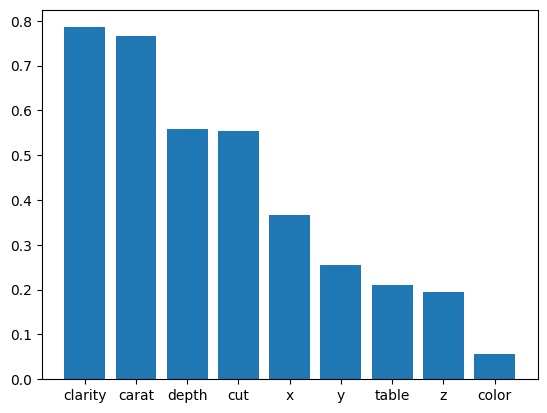

In [ ]:
scaled = scaler.fit_transform(df_results)
df_results_scaled = pd.DataFrame(scaled, columns = df_results.columns)
df_results_scaled.set_index(df_results.index, inplace = True)
df_results_scaled['norm_mean'] = df_results_scaled.mean(axis = 1)
df_results_scaled.sort_values('norm_mean', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results_scaled.index, df_results_scaled.mean(axis = 1))
plt.show()

##Metodos de envoltura o wrapper
Buscaremos los subconjuntos de combinaciones de varibales con mejor desempeño

#Seleccion de caracteristicas exhaustiva
Evalúa todas las combinaciones de características y devuelve los valores que optimizan el modelo.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
lr = LinearRegression()

efs = EFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 9,      # The maximum number of features to consider is 9
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy
          cv = 5)

In [ ]:
efs = efs.fit(x, y)

Features: 511/511

In [ ]:
print('Best accuracy score: %.2f' % efs.best_score_)
# print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Best accuracy score: -1075.57
Best subset (corresponding names): ('carat', 'color', 'clarity', 'table', 'z')


In [ ]:
metric_dict = efs.get_metric_dict()
df_efs = pd.DataFrame(metric_dict).T
df_efs.sort_values('avg_score', ascending=False,  inplace = True)
df_efs_best_10 = df_efs.iloc[:10]
df_efs_best_10

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
296,"(0, 2, 3, 5, 8)","[-975.8302066094249, -1053.5487581471978, -208...",-1075.573164,"(carat, color, clarity, table, z)",686.51119,534.129029,267.064514
387,"(0, 1, 2, 3, 5, 8)","[-976.5541265409241, -1053.5573966987988, -208...",-1076.579124,"(carat, cut, color, clarity, table, z)",686.71267,534.285787,267.142893
69,"(0, 5, 8)","[-1062.693188213706, -1276.7801159466044, -222...",-1081.217833,"(carat, table, z)",861.966775,670.639435,335.319717
161,"(0, 2, 5, 8)","[-1075.029923469857, -1189.2294593802726, -216...",-1083.864914,"(carat, color, table, z)",789.894993,614.56514,307.28257
146,"(0, 1, 5, 8)","[-1061.5281620072035, -1275.770206031584, -223...",-1085.085198,"(carat, cut, table, z)",858.580819,668.005046,334.002523
510,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[-986.6275715088675, -1049.4228808645767, -211...",-1086.154919,"(carat, cut, color, clarity, depth, table, x, ...",695.730506,541.30197,270.650985
508,"(0, 2, 3, 4, 5, 6, 7, 8)","[-987.4358508457566, -1049.4530755960268, -211...",-1086.808429,"(carat, color, clarity, depth, table, x, y, z)",696.219422,541.682363,270.841182
266,"(0, 1, 2, 5, 8)","[-1073.5258698615053, -1188.2049418000822, -21...",-1086.895494,"(carat, cut, color, table, z)",787.47749,612.68424,306.34212
503,"(0, 1, 2, 3, 4, 5, 7, 8)","[-989.8505819757515, -1048.477325180361, -2119...",-1086.905078,"(carat, cut, color, clarity, depth, table, y, z)",699.556791,544.27895,272.139475
472,"(0, 1, 2, 3, 5, 6, 8)","[-985.5658504879249, -1053.5587689162867, -211...",-1087.138798,"(carat, cut, color, clarity, table, x, z)",697.466274,542.652457,271.326228


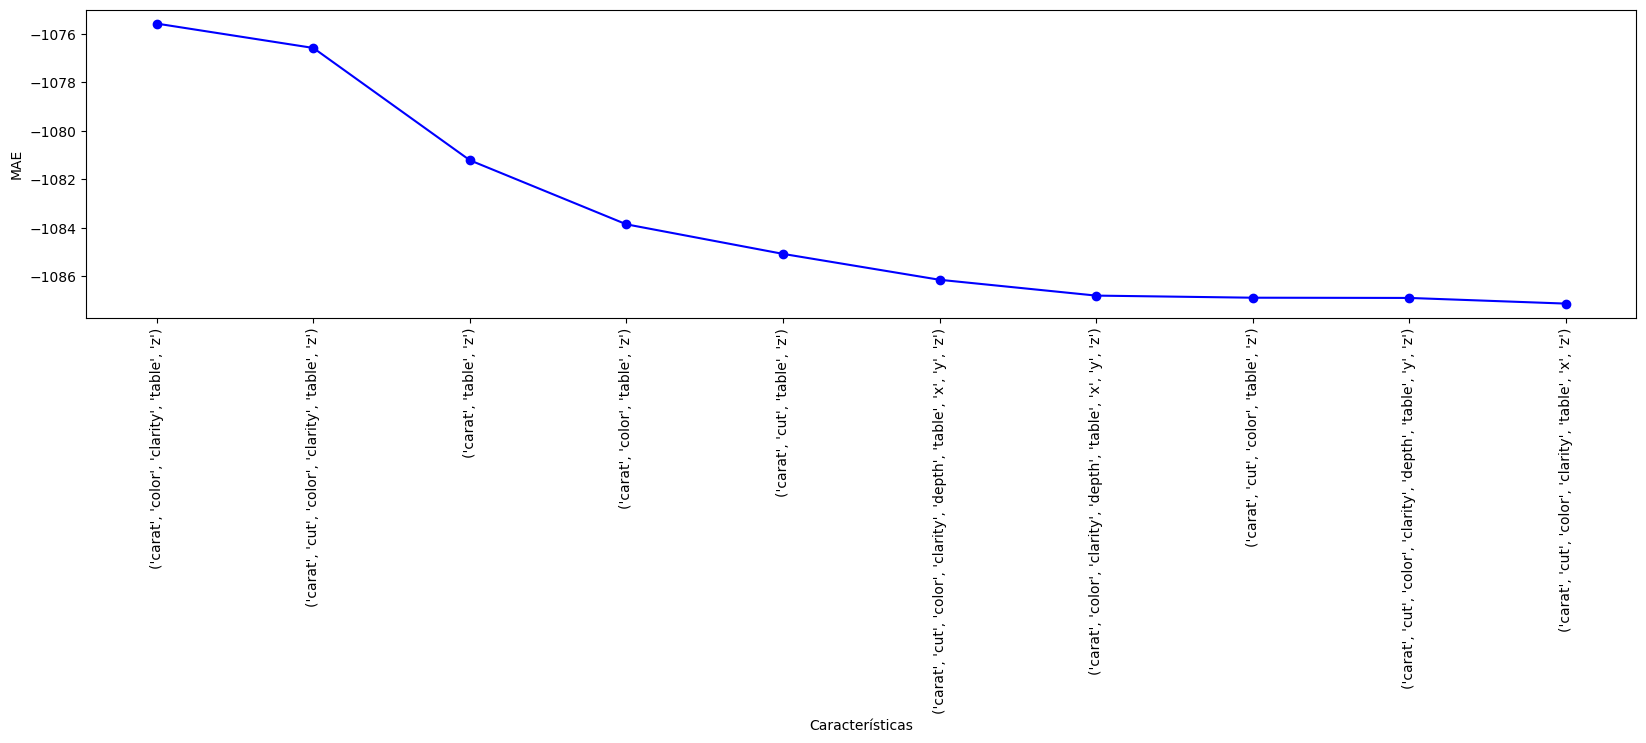

In [ ]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_efs_best_10.feature_names.astype(str),
    df_efs_best_10.avg_score,
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

##Sequential Forward Selection (SFS)
Usa una variable e identifica las variables que mejoran la métrica del modelo

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs = SFS(estimator = lr,        # Use logistic regression as the classifier/estimator
          k_features = (1, 7),  # Consider any feature combination between 1 and 8
          forward = True,       # Set forward to True when we want to perform SFS
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy
          cv=5)

In [ ]:
sfs = sfs.fit(x, y)

In [ ]:
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names
                                                                  # that yield the best score

Best accuracy score: -1075.57
Best subset (corresponding names): ('carat', 'color', 'clarity', 'table', 'z')


In [ ]:
subsets_ = sfs.subsets_
df_sfs = pd.DataFrame(subsets_).T
df_sfs.sort_values('avg_score', ascending=False,  inplace = True)
df_sfs

,feature_idx,cv_scores,avg_score,feature_names
5,"(0, 2, 3, 5, 8)","[-975.8302066094249, -1053.5487581471978, -208...",-1075.573164,"(carat, color, clarity, table, z)"
6,"(0, 1, 2, 3, 5, 8)","[-976.5541265409241, -1053.5573966987988, -208...",-1076.579124,"(carat, cut, color, clarity, table, z)"
3,"(0, 5, 8)","[-1062.693188213706, -1276.7801159466044, -222...",-1081.217833,"(carat, table, z)"
4,"(0, 2, 5, 8)","[-1075.029923469857, -1189.2294593802726, -216...",-1083.864914,"(carat, color, table, z)"
7,"(0, 1, 2, 3, 5, 6, 8)","[-985.5658504879249, -1053.5587689162867, -211...",-1087.138798,"(carat, cut, color, clarity, table, x, z)"
2,"(0, 8)","[-1105.6207117781892, -1278.068251881436, -227...",-1104.355637,"(carat, z)"
1,"(0,)","[-1253.2685138259021, -1284.6276887360368, -23...",-1217.633319,"(carat,)"


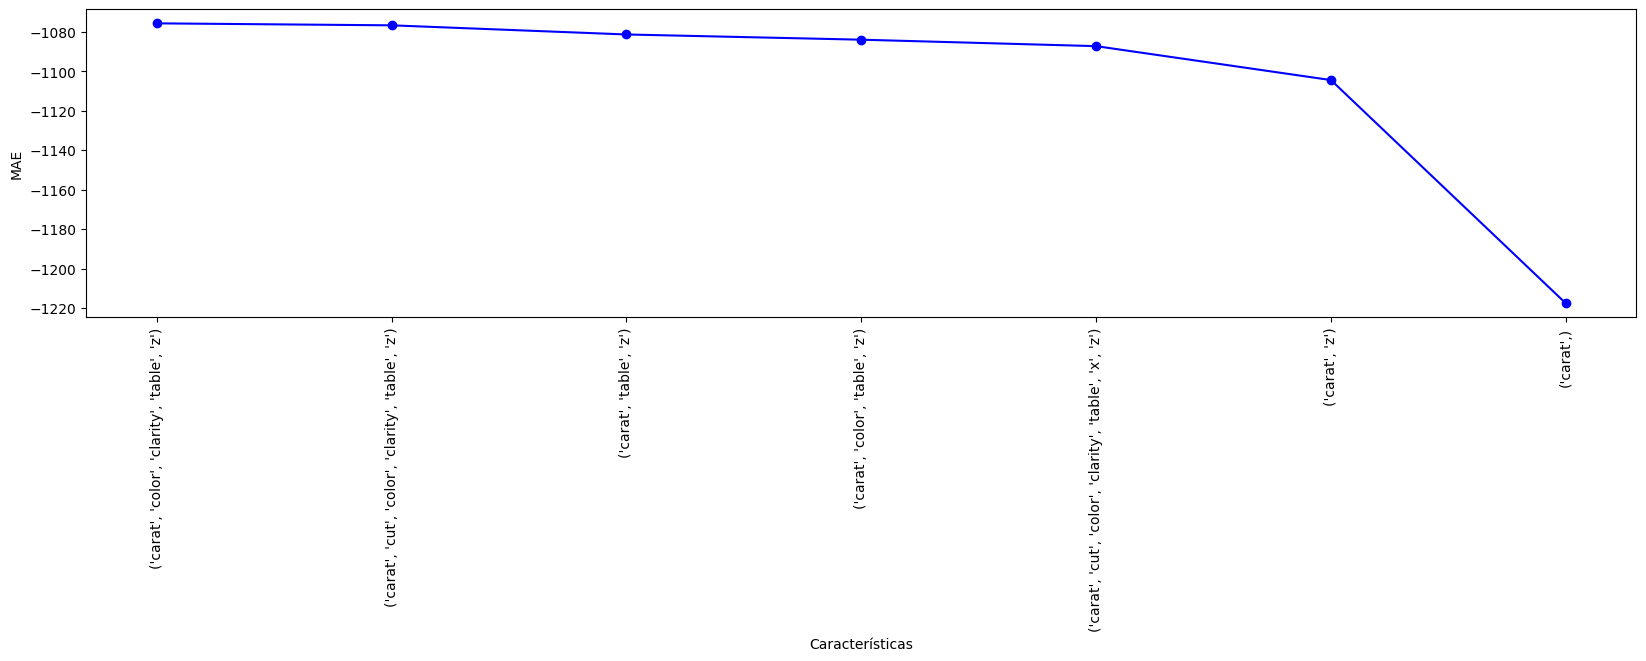

In [ ]:
fig = plt.figure(figsize=(20, 4))

plt.plot(
    df_sfs.feature_names.astype(str),
    df_sfs.avg_score,
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

##Sequential Backward Selection (SBS)


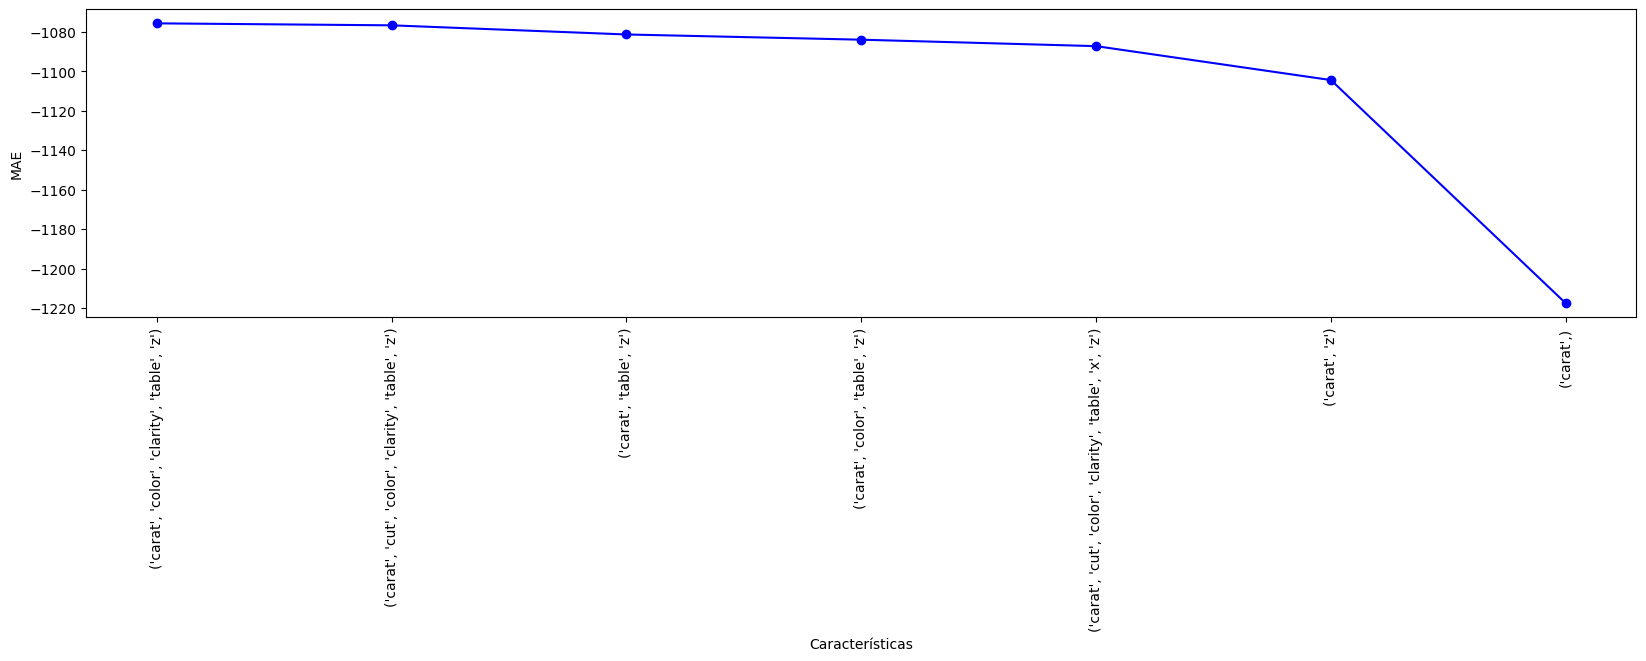

In [ ]:
sbs = SFS(estimator = lr,
          k_features=(1, 7),
          forward=True,
          scoring='neg_mean_absolute_error',
          cv=5)

sbs = sbs.fit(x, y)
subsets_ = sbs.subsets_
df_sbs = pd.DataFrame(subsets_).T
df_sbs.sort_values('avg_score', ascending=False,  inplace = True)

fig = plt.figure(figsize=(20, 4))
plt.plot(
    df_sbs.feature_names.astype(str),
    df_sbs.avg_score,
    color='blue', marker='o'
)
plt.ylabel('MAE')
plt.xlabel('Características')

plt.xticks(rotation = 90)

plt.show()

##PCA
Reducimos la dimencionalidad de características mediante hiperparámetros que incluyan las características que más varianza tengan para explicar un modelo.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
pca = PCA(n_components = 3)
pca_model = pca.fit(x_scaled)

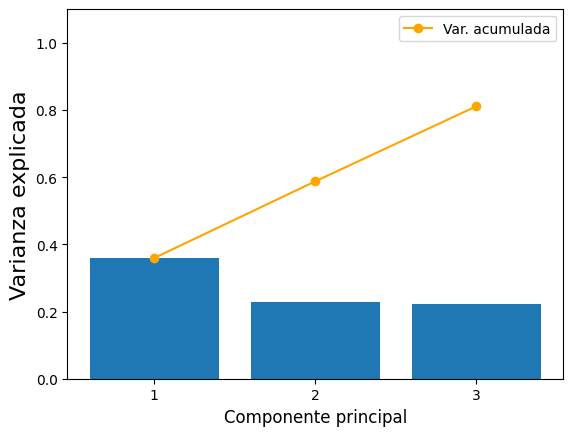

In [ ]:
plt.figure()
plt.bar(np.arange(pca_model.n_components_) + 1, pca_model.explained_variance_ratio_)
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
plt.plot(range(1, 4),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca_model.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

Vamos a conocer los coeficintes usados en el PCA para sus componentes

In [ ]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca_model.components_,
  columns = x_scaled.columns,
  index = ['pca1', 'pca2', 'pca3']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3
color,0.636027,-0.555340,0.391315
y,0.408830,0.151269,-0.137713
x,0.403409,0.151932,-0.133103
z,0.355557,0.139197,-0.105229
carat,0.248697,0.085756,-0.074205
table,0.029374,0.002311,-0.048465
cut,0.013037,-0.508331,-0.850469
depth,0.008190,0.026028,0.045260
clarity,-0.276076,-0.599849,0.256744


In [ ]:
formula = ''
for i, r in pca_coef.iterrows():
    formula = formula +  str(round(r.pca1, 4)) + ' \text{' + i + '} + '
formula

'0.636 \text{color} + 0.4088 \text{y} + 0.4034 \text{x} + 0.3556 \text{z} + 0.2487 \text{carat} + 0.0294 \text{table} + 0.013 \text{cut} + 0.0082 \text{depth} + -0.2761 \text{clarity} + '

$$
{PCA}_{1} = 0.636 \cdot \text{color} + 0.4088 \cdot \text{y} + 0.4034 \cdot \text{x} + 0.3556 \cdot \text{z} + 0.2487 \cdot \text{carat} + 0.0294 \cdot \text{table} + 0.013 \cdot \text{cut} + 0.0082 \cdot \text{depth} - 0.2761 \cdot \text{clarity}
$$

##Conclucion

En base a los distintos metodos utilizados se puede decir que las varibales que cumplen de la mejor manera son las de carat, color, clarity, table y z.

Esto puedo decirlo debido a que entre las varibales x,y,z que simbolizan las dimenciones del diamante tienen mucha dependencia entre si mismas. Tambien puede descartarse la variable depth por su baja relevancia al momento de calcular el valor de price.

##Referencias
https://deepnote.com/app/john-jairo-pardo-moreno/En-Vivo-7a7f4ed2-56f0-482f-bf87-aecf9d4effad

https://www.kaggle.com/datasets/shivam2503/diamonds/code?datasetId=1312&sortBy=voteCount

https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction

